In [22]:
%matplotlib inline
import numpy as np
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
names = np.array(['Boaz', 'Parnell', 'Eddie', 'Rich', 'Vlad', 'Brad', 'Kris'])
def normalize(mat):
    new_mat = []
    for row in mat:
        s = float(np.sum(row))
        new_row = [x/s for x in row]
        new_mat.append(new_row)
    return np.array(new_mat, float)
def set_zero_diag(mat):
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            if j == i:
                mat[i][j] = 0
    return mat

In [23]:
#a = np.array([[1,2], [3,4]], float)
chats = np.random.randint(35, size=(7,7))
chats = set_zero_diag(chats)
print (chats)

[[ 0  9 17 14  4 28 19]
 [14  0  9  4  8 33 33]
 [20 13  0  3 27 31 26]
 [18  5 17  0 33 26 32]
 [12 21 20 23  0 29  0]
 [17 24 10  0 24  0 17]
 [11 25  2 27 18 27  0]]


In [24]:
norm_chats = normalize(chats)
#norm_chats = norm_chats.transpose()
print (norm_chats)


[[ 0.       0.0989   0.18681  0.15385  0.04396  0.30769  0.20879]
 [ 0.13861  0.       0.08911  0.0396   0.07921  0.32673  0.32673]
 [ 0.16667  0.10833  0.       0.025    0.225    0.25833  0.21667]
 [ 0.1374   0.03817  0.12977  0.       0.25191  0.19847  0.24427]
 [ 0.11429  0.2      0.19048  0.21905  0.       0.27619  0.     ]
 [ 0.18478  0.26087  0.1087   0.       0.26087  0.       0.18478]
 [ 0.1      0.22727  0.01818  0.24545  0.16364  0.24545  0.     ]]


In [27]:
vals, vecs = np.linalg.eig(norm_chats)
print vals[0]
eig_names = [(names[i], vecs[0][i]) for i in range(len(names))]
sorted_names = sorted(eig_names, key=lambda x: x[1])
for n in sorted_names:
    print n

(1+0j)
('Eddie', (-0.47404565138063653-0.050568059889229799j))
('Parnell', (-0.47404565138063653+0.050568059889229799j))
('Boaz', (-0.37796447300922714+0j))
('Kris', (-0.28819415997072134+0j))
('Vlad', (-0.085162918425588777-0.094524057372389725j))
('Rich', (-0.085162918425588777+0.094524057372389725j))
('Brad', (0.89560411055327938+0j))


In [29]:
chats_given = chats.transpose()
chats_given

array([[ 0, 14, 20, 18, 12, 17, 11],
       [ 9,  0, 13,  5, 21, 24, 25],
       [17,  9,  0, 17, 20, 10,  2],
       [14,  4,  3,  0, 23,  0, 27],
       [ 4,  8, 27, 33,  0, 24, 18],
       [28, 33, 31, 26, 29,  0, 27],
       [19, 33, 26, 32,  0, 17,  0]])

In [42]:
Z = linkage(chats, 'average')
Z

array([[  2.     ,   3.     ,  21.51743,   2.     ],
       [  0.     ,   1.     ,  26.03843,   2.     ],
       [  4.     ,   6.     ,  26.1725 ,   2.     ],
       [  7.     ,   8.     ,  32.91245,   4.     ],
       [  5.     ,  10.     ,  41.07511,   5.     ],
       [  9.     ,  11.     ,  44.50826,   7.     ]])

In [43]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(chats))
c

0.76327347473496843

[[  2.        3.       21.51743   2.     ]
 [  0.        1.       26.03843   2.     ]
 [  4.        6.       26.1725    2.     ]
 [  7.        8.       32.91245   4.     ]
 [  5.       10.       41.07511   5.     ]
 [  9.       11.       44.50826   7.     ]]


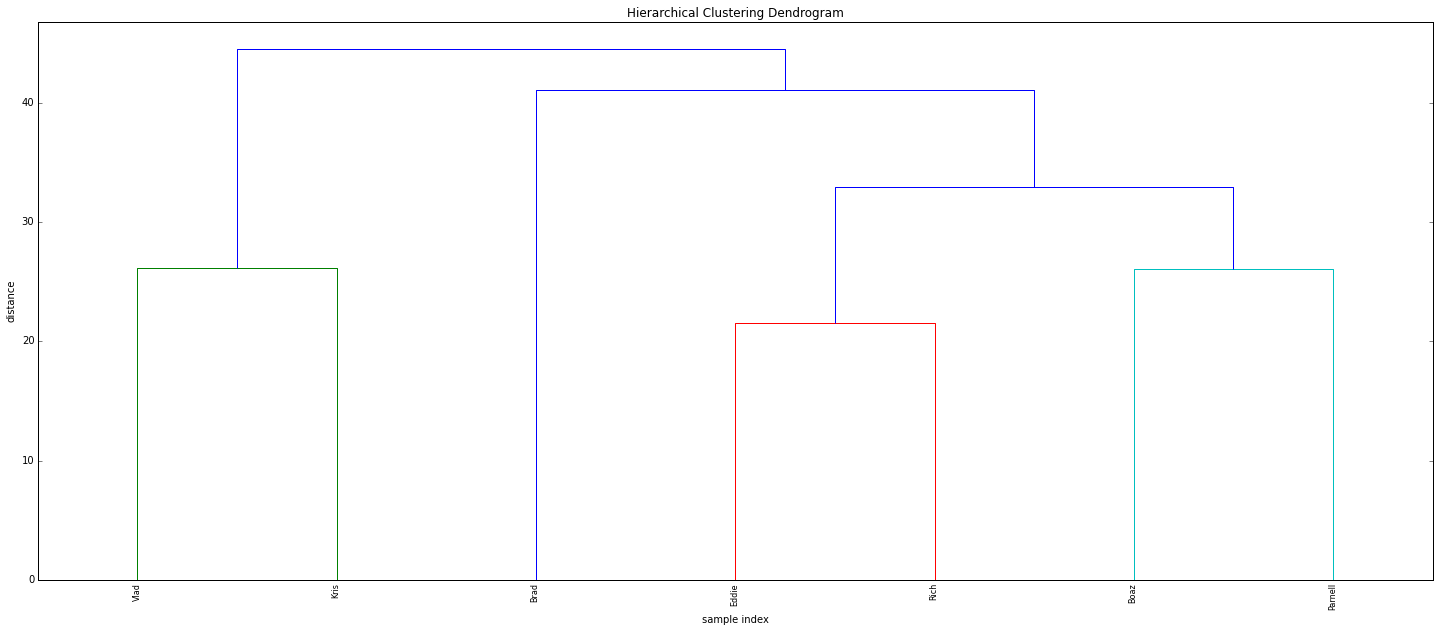

In [46]:
print(Z)
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=names
)
plt.show()

In [2]:
#http://networkx.github.io/examples.html
import networkx as nx
G=nx.Graph()
G

